In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# 1.Read data from excel file

In [3]:
df=pd.read_excel('Data_Excel.xlsx')

# 2.Visualization: provinces using  Latitude and Longtitude from data

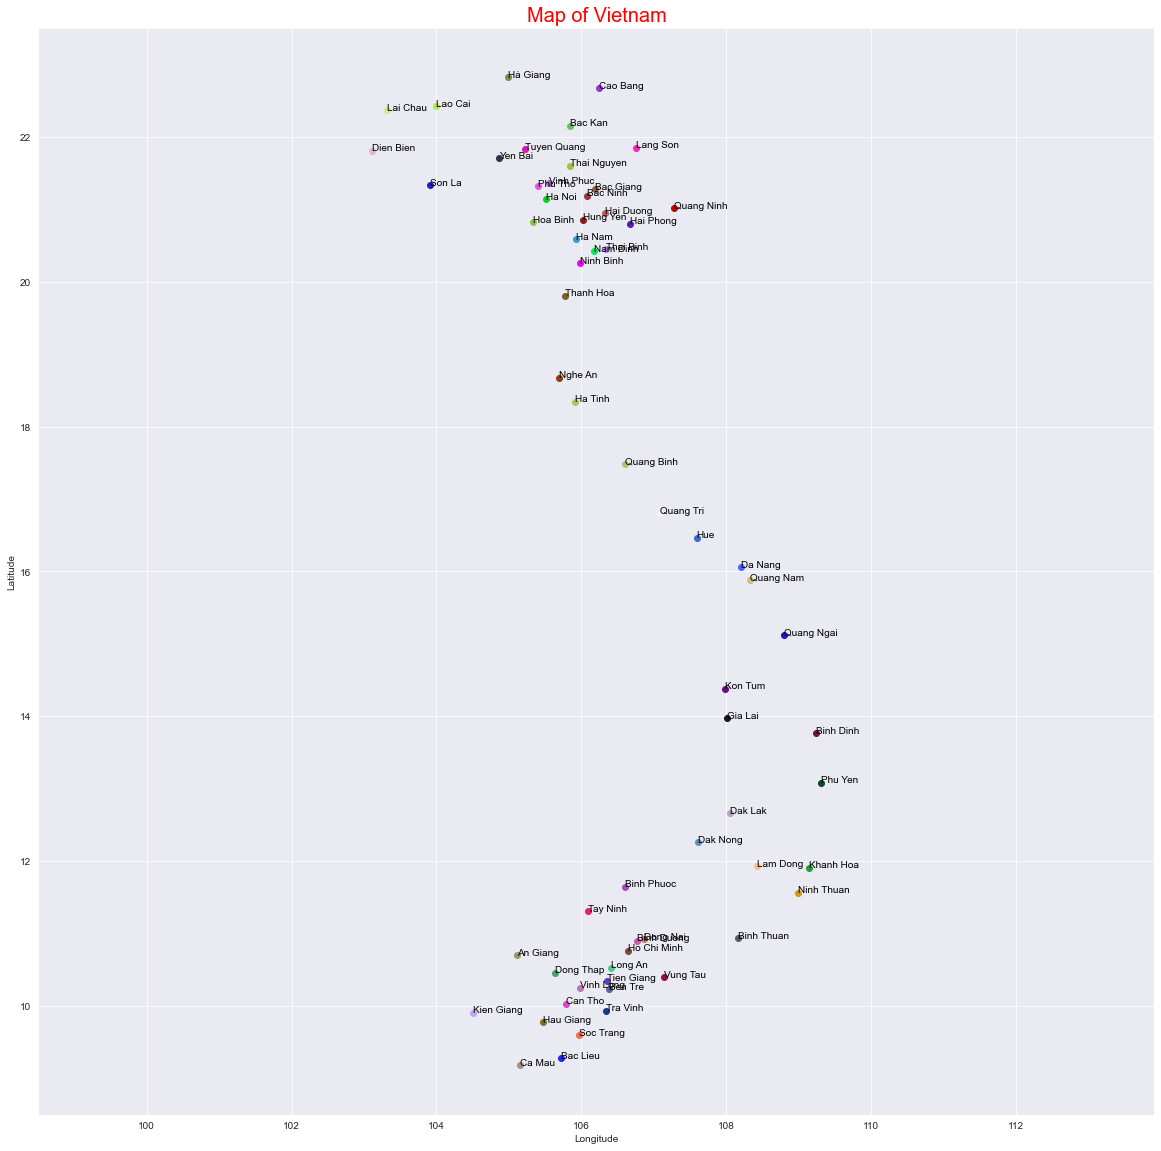

In [4]:
# Visualize
Longitude, Latitude, Province = df["Longitude"],df["Latitude"],df["Province"]

# change style plt
sns.set_style("darkgrid")

# size fig
plt.figure(figsize = (20,20))

# scatter
# plt.scatter(Longitude,Latitude, c = color, alpha = 0.4)

for x, y in zip(Longitude, Latitude):
    rgb = np.random.rand(3,)
    plt.scatter(x, y, c=[rgb], alpha = 1)

plt.axis([102,110,8,30])
plt.axis("equal")

# label
plt.title("Map of Vietnam", color = "red",fontsize = 20, alpha = 1)
plt.xlabel("Longitude", fontsize = 10)
plt.ylabel("Latitude", fontsize = 10)

for i in range(len(Province)):
    plt.text(Longitude[i],Latitude[i],Province[i],color = "black", fontsize = 10,alpha = 1)
# show
plt.show();

# 3.Initialize the values of the problem

In [5]:
# Start , End:
start=input('Start: ')
end=input('End: ')
# number main warhouse(3-5 main warehouse)
#n=int(input())
# main warehouses:
#list_main_warehouse=[]
#for i in range(n):
#    list_main_warehouse.append(input())
#list_main_warehouse 
#cost of flight and cost_road (milion VNĐ/h)
#cost_flight=10
#cost_road=0.5
#velocity of flight and velocity of road (km/h)
#velocity_flight=950
#velocity_road=80
print(start)

Start: Ha Noi
End: Ho Chi Minh
Ha Noi


# 4. Convert matrix into list : distance provices

In [6]:
# we convert matrix distance into list distance
list_distance=[]
for i in df.values:
    list_distance.append(list(i[1:-2]))
print(list_distance[0])
# we convert province into index in list distance
dict_index_province={}
for i in range(len(Province)):
    dict_index_province[Province[i].strip()]=i
print(dict_index_province)
# example of how to get the distance between 2 provinces
list_distance[dict_index_province['Vinh Phuc']][dict_index_province['Can Tho']]# distance Vinh Phuc to Can Tho

[0.0, 1160.328125307107, 1116.327581802065, 124.340008794874, 30.5586502476945, 597.4550908384311, 1160.851404175675, 1132.378709454002, 885.6947213342979, 642.2067956235431, 1010.212451202627, 300.4857814008529, 1075.26044413697, 261.265604015772, 1208.275219211866, 67.57105090003915, 240.1573238181206, 436.887325752567, 148.8775375321979, 167.0169124814286, 1180.996234104405, 1077.443119273608, 537.6457572318318, 233.1656422377148, 20.66979307944501, 388.4239577973921, 193.4550415653024, 115.5178958606144, 166.5915307900105, 270.9434670459997, 1141.59601872699, 846.771545746579, 747.4236408044728, 1232.931512743067, 386.6332662050546, 36.72169888070128, 97.75035244313683, 1058.005018436204, 85.45783350841474, 56.11735473867661, 1126.947727120911, 428.1045371138408, 92.43730842840938, 168.433418614891, 1231.088805924362, 673.7591032631532, 1326.705847902485, 65.51581351638117, 1169.929014907036, 1325.329840468724, 98.7310405656501, 1352.918818153952, 1240.050578596897, 1269.5427181196

1260.217143922348

# 5.Data about neighbour of the neighbor of the province

In [7]:
data_neighbour={'Lai Chau':['Dien Bien','Lao Cai','Son La','Yen Bai'],\
                'Yen Bai':['Lao Cai','Lai Chau','Son La','Hà Giang','Phu Tho','Tuyen Quang'],\
                'Dien Bien':['Lai Chau','Son La'],\
                'Thanh Hoa':['Son La','Nghe An','Ninh Binh','Hoa Binh'],
                'Nghe An':['Ha Tinh','Thanh Hoa'],\
                'Quang Binh':['Ha Tinh','Quang Tri'] ,\
                'Ha Tinh':['Nghe An','Quang Binh'],\
                'Quang Tri':['Quang Binh','Hue'],\
                'Hue':['Quang Tri','Da Nang','Quang Nam'],\
               'Da Nang':['Hue','Quang Nam'],\
                'Quang Nam':['Da Nang','Hue','Kon Tum','Quang Ngai'],\
                'Kon Tum':['Quang Nam','Quang Ngai','Gia Lai'],\
                'Quang Ngai':['Kon Tum','Quang Nam','Binh Dinh'],\
                'Gia Lai':['Kon Tum','Binh Dinh','Phu Yen','Dak Lak'],\
                'Binh Dinh':['Quang Ngai','Gia Lai','Phu Yen'],\
                'Dak Lak':['Dak Nong','Lam Dong','Khanh Hoa','Phu Yen','Gia Lai'],\
                'Phu Yen':['Gia Lai','Binh Dinh','Dak Lak','Khanh Hoa'],\
                'Khanh Hoa':['Dak Lak','Phu Yen','Lam Dong','Ninh Thuan'],\
                'Dak Nong':['Dak Lak','Lam Dong','Binh Phuoc'],\
                'Lam Dong':['Dak Lak','Dak Nong','Binh Phuoc','Dong Nai','Binh Thuan','Ninh Thuan','Khanh Hoa'],\
                'Ninh Thuan':['Lam Dong','Khanh Hoa','Binh Thuan'],\
                'Binh Phuoc':['Tay Ninh','Binh Duong','Dong Nai','Dak Nong','Lam Dong'],\
                'Dong Nai':['Lam Dong','Binh Phuoc','Binh Thuan','Ho Chi Minh','Vung Tau','Binh Duong'],\
                'Binh Thuan':['Vung Tau','Lam Dong','Ninh Thuan','Dong Nai'],\
                'Tay Ninh':['Long An', 'Ho Chi Minh', 'Binh Duong','Binh Phuoc'],\
                'Binh Duong':['Tay Ninh','Ho Chi Minh','Dong Nai','Binh Phuoc'],\
                'Ho Chi Minh':['Tay Ninh','Binh Duong','Dong Nai','Long An','Vung Tau'],\
                'Vung Tau':['Ho Chi Minh','Dong Nai','Binh Thuan'],\
                'Long An':['Tay Ninh','Ho Chi Minh','Dong Thap','Tien Giang'],\
                'Dong Thap':['Long An','Tien Giang','Vinh Long','Can Tho','An Giang'],\
                'Tien Giang':['Long An','Dong Thap','Vinh Long','Ben Tre'],\
                'Ben Tre':['Vinh Long','Tien Giang','Tra Vinh'],\
                'An Giang':['Kien Giang','Can Tho','Dong Thap'],\
                'Can Tho':['Kien Giang','An Giang','Dong Thap','Vinh Long','Hau Giang'],\
                'Vinh Long':['Can Tho','Dong Thap','Ben Tre','Tra Vinh','Hau Giang'],\
                'Tra Vinh':['Ben Tre','Vinh Long','Soc Trang'],\
                'Soc Trang':['Hau Giang','Bac Lieu','Tra Vinh'],\
                'Hau Giang':[ 'Kien Giang','Bac Lieu','Soc Trang','Can Tho','Vinh Long'],\
                'Kien Giang':['An Giang','Can Tho','Hau Giang','Bac Lieu','Ca Mau'],\
                'Bac Lieu':['Kien Giang','Hau Giang','Soc Trang','Ca Mau'],\
                'Ca Mau':['Kien Giang','Bac Lieu'],\
                'Ha Noi':['Phu Tho','Hoa Binh','Bac Giang','Vinh Phuc','Bac Ninh','Hung Yen','Ha Nam'],\
                'Phu Tho':['Son La','Yen Bai','Hoa Binh','Ha Noi','Vinh Phuc','Tuyen Quang'],\
                'Hoa Binh':['Ninh Binh','Thanh Hoa','Ha Nam','Ha Noi','Phu Tho','Son La'],\
                'Bac Giang':['Quang Ninh','Hai Duong','Bac Ninh','Ha Noi','Thai Nguyen','Lang Son'],\
                'Vinh Phuc':['Phu Tho', 'Ha Noi','Thai Nguyen','Tuyen Quang'],\
                'Bac Ninh':['Ha Noi','Hung Yen','Hai Duong', 'Bac Giang'],\
                'Hung Yen':['Ha Noi','Bac Ninh','Hai Duong','Thai Binh','Ha Nam'],\
                'Ha Nam':['Ha Noi','Hung Yen','Thai Binh','Nam Dinh','Ninh Binh','Hoa Binh'],\
                'Hai Phong':['Thai Binh','Thai Binh','Quang Ninh'],\
                'Hai Duong':['Bac Ninh', 'Hung Yen','Thai Binh','Hai Phong','Quang Ninh','Bac Giang'],\
                'Nam Dinh':['Ninh Binh','Ha Nam','Thai Binh'],\
                'Thai Nguyen':['Tuyen Quang', 'Bac Kan','Lang Son','Bac Giang','Ha Noi','Vinh Phuc'],\
                'Thai Binh':['Nam Dinh', 'Ha Nam','Hung Yen','Hai Duong','Hai Duong','Hai Phong'],\
                'Quang Ninh':['Hai Duong','Hai Phong','Bac Giang','Lang Son'],\
                'Lang Son':['Quang Ninh','Bac Giang','Thai Nguyen','Bac Kan','Cao Bang'],\
                'Ninh Binh':['Hoa Binh','Thanh Hoa','Nam Dinh','Ha Nam'],\
                'Lao Cai':['Lai Chau','Yen Bai','Hà Giang'],\
                'Cao Bang':['Hà Giang','Bac Kan','Lang Son'],\
                'Hà Giang':['Cao Bang','Tuyen Quang','Yen Bai','Lao Cai'],\
                'Tuyen Quang':['Hà Giang','Bac Kan','Thai Nguyen','Vinh Phuc','Phu Tho','Yen Bai'],\
                'Bac Kan':['Tuyen Quang','Thai Nguyen','Lang Son','Cao Bang'],\
                'Son La':['Dien Bien','Yen Bai','Phu Tho','Hoa Binh','Thanh Hoa'],\
               }

len(data_neighbour.keys())

63

# 6. IDA_star

In [ ]:
import time
start_time = time.time()
start='Ho Chi Minh'
goal='Ha Noi'
list_node_previous={} # solution path
def IDA_star():
    global list_node_previous
    #define a threshold: theta =f(root_node) with f(n)=h(n)+g(n)
    threshold=list_distance[dict_index_province[start]][dict_index_province[goal]] 
    while True: # run infinity
        temp=search(start,0,threshold,parent='Null') #function search(node,g score,threshold)
        if temp=='FOUND': #if goal found
            return ('FOUND',threshold)
        threshold=temp  
def search(node,g,threshold,parent):  #recursive function
    f=g+list_distance[dict_index_province[node]][dict_index_province[goal]]
    if (f>threshold):#greater f encountered
        return f
    if (f<=threshold):
        list_node_previous[node]=parent
    if node==goal:   #Goal node found
        return 'FOUND'
    minn=10**10 #minn= Minimum integer
    for tempnode in nextnodes(node):
        #recursive call with next node as current node for depth search
        temp=search(tempnode,g+list_distance[dict_index_province[node]][dict_index_province[tempnode]],threshold,node)
        if temp=='FOUND':# if goal found
            return 'FOUND'
        if (temp<minn):# find the minimum of all f greater than threshold encountered  
            minn=temp
    return minn #//return the minimum f encountered greater than threshold
def nextnodes(node):
    return data_neighbour[node] #return list of all possible next nodes from node
print(IDA_star())
end_time=time.time()
print(end_time-start_time)
solution_path_optimal=[]
check=goal
solution_path_optimal.append(check)
while check!=start:
    check=list_node_previous[check]
    solution_path_optimal.append(check)
print(solution_path_optimal)
print('Solution path of problem is')

print(' -> '.join(solution_path_optimal[::-1]))

('FOUND', 1372.9812845229483)
32.36203360557556
